# **Tarea: SVD Simple**

## Alumno: José de Jesús Hernández Higuera

### Matrícula: 224470489

1. Load the image dog.jpg and compute the economy SVD. Compute the relative reconstruction error of the truncated SVD in the Frobenius norm as a function of the rank $r$. Square this error to compute the fraction of missing variance as a function of $r$. You may also decide to plot 1 minus the error or missing variance to visualize the amount of norm or variance captured at a given rank $r$. Plot these quantities along with the cumulative sum of singular values as a function of $r$. Find the rank $r$ where the reconstruction captures 99% of the total variance. Compare this with the rank $r$ where the reconstruction captures 99% in the Frobenius norm and with the rank $r$ that captures 99% of the cumulative sum of singular values.

*First, we're loading the image and compute the economy SVD.*

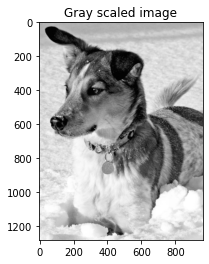

In [8]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

# Loading the image
A = imread('dog.jpeg')
X = np.mean(A, -1) # Convert RGB to grayscale

# Computing the economy SVD
U, S, VT = np.linalg.svd(X, full_matrices=False)

# Let's see the image
plt.imshow(X, cmap='gray')
plt.title('Gray scaled image')
plt.show()

*We know that the relative reconstruction error is given by:*

\begin{equation*}
    \dfrac{||X - \tilde{X}||^2_F}{||X||^2_F}
\end{equation*}

*where $||X||_F = \sqrt{\sum^n_{i=1} \sum^m_{j=1} |X_{i,j}|^2} $ is the Frobenius norm. Let's compute this error as a function of the rank.*

In [22]:
# Defining the function for the relative reconstruction error
def rel_error(X, U, S, VT, r):
    Xr = U[:, :r] @ np.diag(S[:r]) @ VT[:r, :] # This represents the truncated matrix X
    error = np.linalg.norm(X - Xr, 'fro') / np.linalg.norm(X, 'fro')
    return error

# Let's use it for every possible rank and save the results as a list
r_max = len(S)
errors = [rel_error(X, U, S, VT, r) for r in range(1, r_max + 1)]

*We're going to use this to calculate the captured variance as:*

\begin{equation*}
    Captured~variance(r) = 1 - (Relative~error(r))^2
\end{equation*}

*where $(Relative~error(r))^2$ is the missing variance. Let's compute both.*

In [10]:
missing_variance = [error**2 for error in errors]
captured_variance = [1 - error**2 for error in errors]

*Before ploting, first, we're going to calculate the cumulative sum of singular values as a function of the rank. This quantity is given by:*

\begin{equation*}
    Cumulative~sum(r) = \dfrac{\sum^r_{i=1} \sigma_i}{\sum^{r_{max}}_{i=1} \sigma_i}
\end{equation*}

In [11]:
cumulative = np.cumsum(S) / np.sum(S)

*Now, we're going to plot each function.*

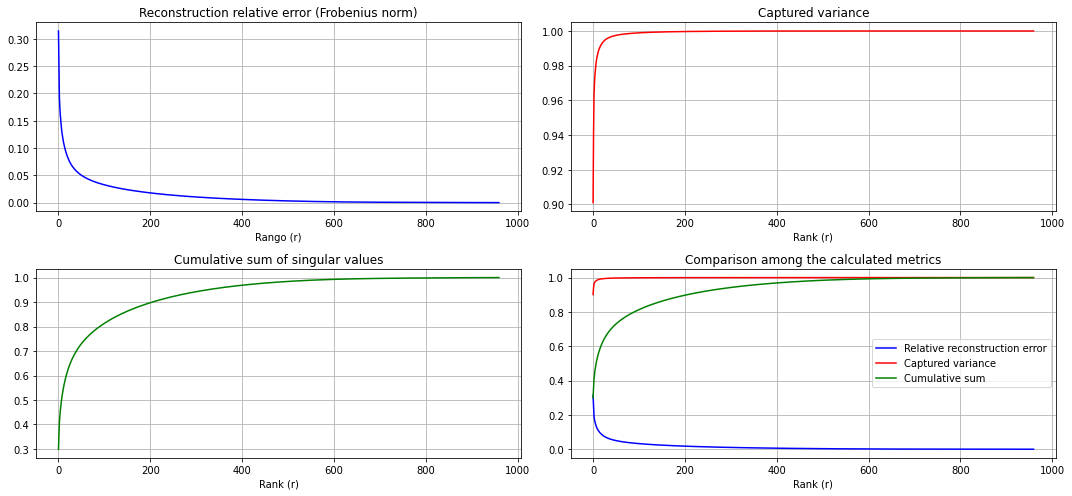

In [20]:
plt.figure(figsize=(15,7))

# Relative reconstruction error
plt.subplot(2, 2, 1)
plt.plot(errors, 'b-')
plt.title('Reconstruction relative error (Frobenius norm)')
plt.xlabel('Rango (r)')
plt.grid(True)

# Captured variance
plt.subplot(2, 2, 2)
plt.plot(captured_variance, 'r-')
plt.title('Captured variance')
plt.xlabel('Rank (r)')
plt.grid(True)

# Cumulative sum of singular values
plt.subplot(2, 2, 3)
plt.plot(cumulative, 'g-')
plt.title('Cumulative sum of singular values')
plt.xlabel('Rank (r)')
plt.grid(True)

# Comparison
plt.subplot(2, 2, 4)
plt.plot(errors, color='blue', label='Relative reconstruction error')
plt.plot(captured_variance, color='red', label='Captured variance')
plt.plot(cumulative, color='green', label='Cumulative sum')
plt.title('Comparison among the calculated metrics')
plt.xlabel('Rank (r)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

*Let's find the rank where we take the 99% of each metric.*

In [21]:
# Captured variance
r_var = np.argmax(np.array(captured_variance) >= 0.99) + 1

# Frobenius norm
r_fro = np.argmax(np.array(errors) <= 0.01) + 1

# Cumulative sum
r_cumul = np.argmax(cumulative >= 0.99) + 1

# Printing the results
print(f"Rank for the 99% of the captured variance: {r_var}")
print(f"Rank for the 99% in the Frobenius norm: {r_fro}")
print(f"Rank for the 99% of the cumulative sum: {r_cumul}")

Rank for the 99% of the captured variance: 15
Rank for the 99% in the Frobenius norm: 307
Rank for the 99% of the cumulative sum: 560


*Let's see the reconstruction of the image based in the corresponding rank.*

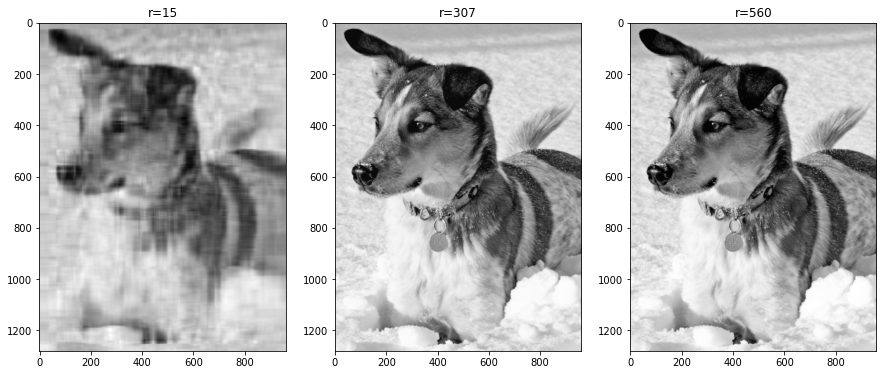

In [ ]:
plt.figure(figsize=(15, 7))
plt.subplot(131); plt.imshow(U[:, :15] @ np.diag(S[:15]) @ VT[:15, :], cmap='gray'); plt.title(f'r={r_var}')
plt.subplot(132); plt.imshow(U[:, :307] @ np.diag(S[:307]) @ VT[:307, :], cmap='gray'); plt.title(f'r={r_fro}')
plt.subplot(133); plt.imshow(U[:, :560] @ np.diag(S[:560]) @ VT[:560, :], cmap='gray'); plt.title(f'r={r_cumul}')
plt.show()

2. Generate a random $100 \times 100$ matrix, i.e., a matrix whose entries are sampled from a normal distribution. Compute the SVD of this matrix and plot the singular values. Repeat this 100 times and plot the distribution of singular values in a box-and-whisker plot. Plot the mean and median singular values as a function of r. Now repeat this for different matrix sizes (e.g., $50 \times 50$, $200 \times 200$, $500 \times 500$).

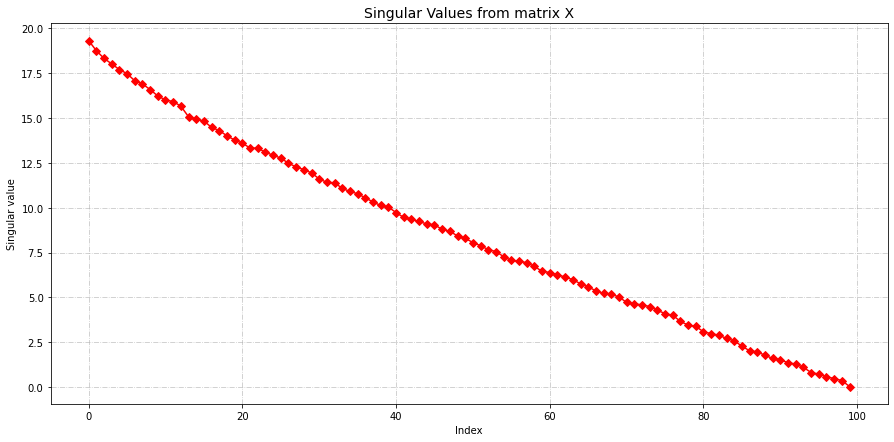

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.random.normal(loc=0, scale=1, size=(100, 100)) #We're using the Standard Normal Distribution
U, S, VT = np.linalg.svd(X, full_matrices=True) # Applying the full SVD

# Let's plot the singular values
plt.figure(figsize=(15, 7))
plt.plot(S, marker='D', color='red')
plt.title('Singular Values from matrix X', fontsize=14)
plt.xlabel('Index')
plt.ylabel('Singular value')
plt.grid(linestyle='-.', alpha=0.7)
plt.show()

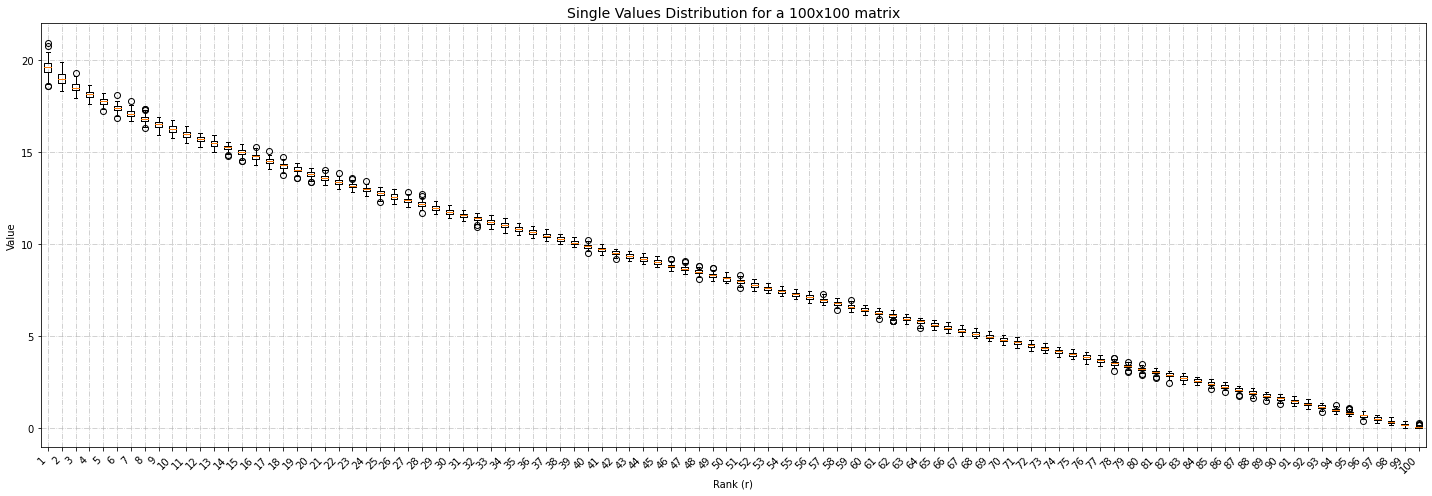

In [3]:
# Let's repeat the same process 100 times
n = 100 # Repetitions
singular_values = np.zeros((n, 100))

# This is the cycled process
for i in range(n):
    X = np.random.normal(loc=0, scale=1, size=(100, 100)) #We're using the Standard Normal Distribution
    U, S, VT = np.linalg.svd(X, full_matrices=True) # Applying the full SVD
    singular_values[i, :] = S

# Let's do the box-and-whisker plot
plt.figure(figsize=(20, 7))
plt.boxplot(singular_values, labels=[i+1 for i in range(100)])
plt.title('Single Values Distribution for a 100x100 matrix', fontsize=14)
plt.xlabel('Rank (r)')
plt.ylabel('Value')
plt.grid(linestyle='-.', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

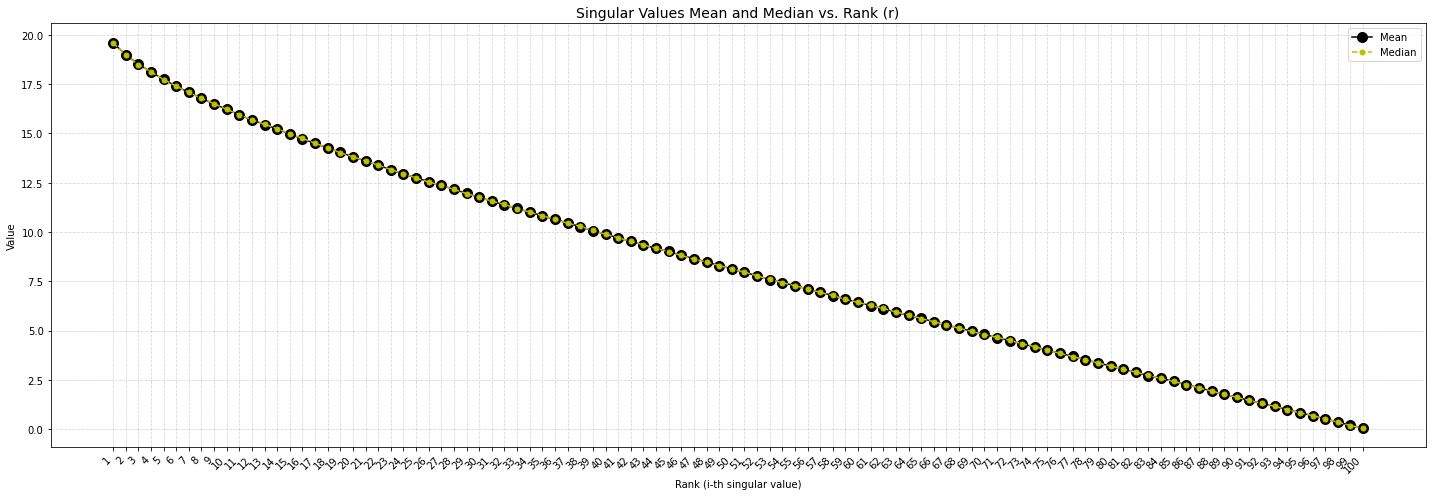

In [4]:
# We're computing the singular values mean and median
mean= np.mean(singular_values, axis=0)
median = np.median(singular_values, axis=0)

# And here we're ploting the results
plt.figure(figsize=(20, 7))
plt.plot(range(1, 100 + 1), mean, 'ko-', label="Mean", markersize=10)
plt.plot(range(1, 100 + 1), median, 'yo--', label="Median", markersize=5)
plt.title("Singular Values Mean and Median vs. Rank (r)", fontsize=14)
plt.xlabel("Rank (i-th singular value)")
plt.ylabel("Value")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(1, 100 + 1), rotation=45, ha='right')
plt.tight_layout()
plt.show()

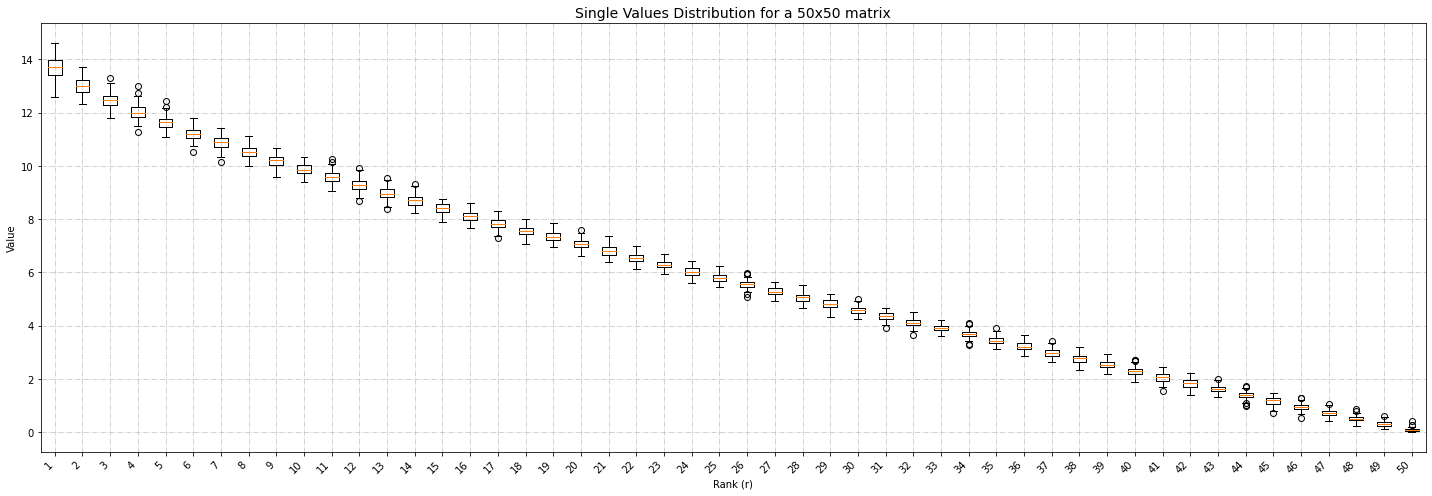

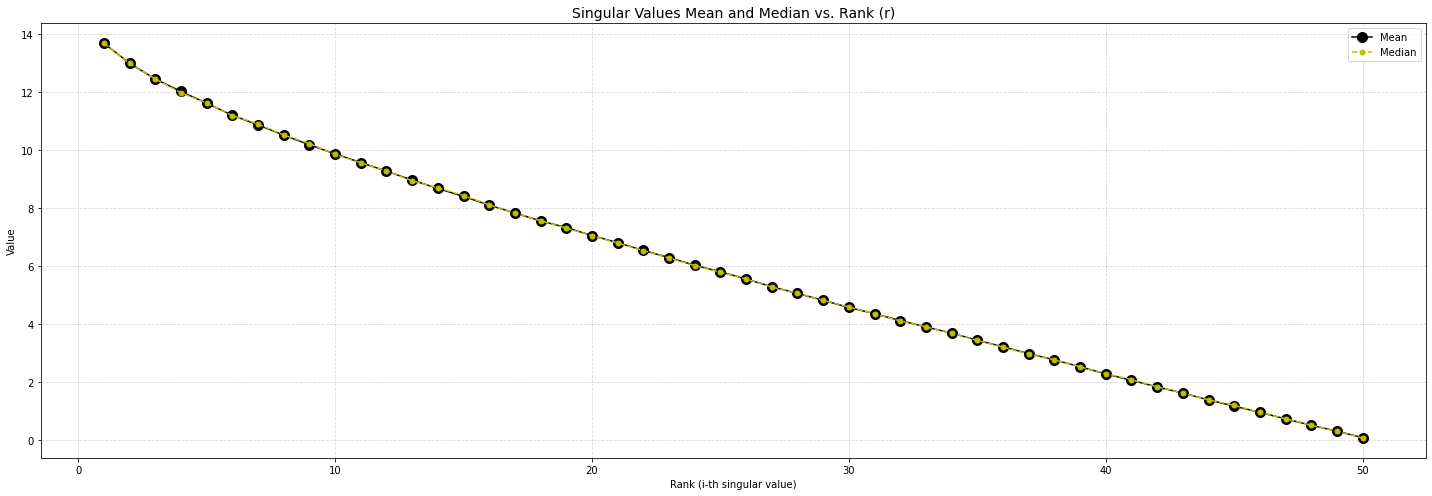

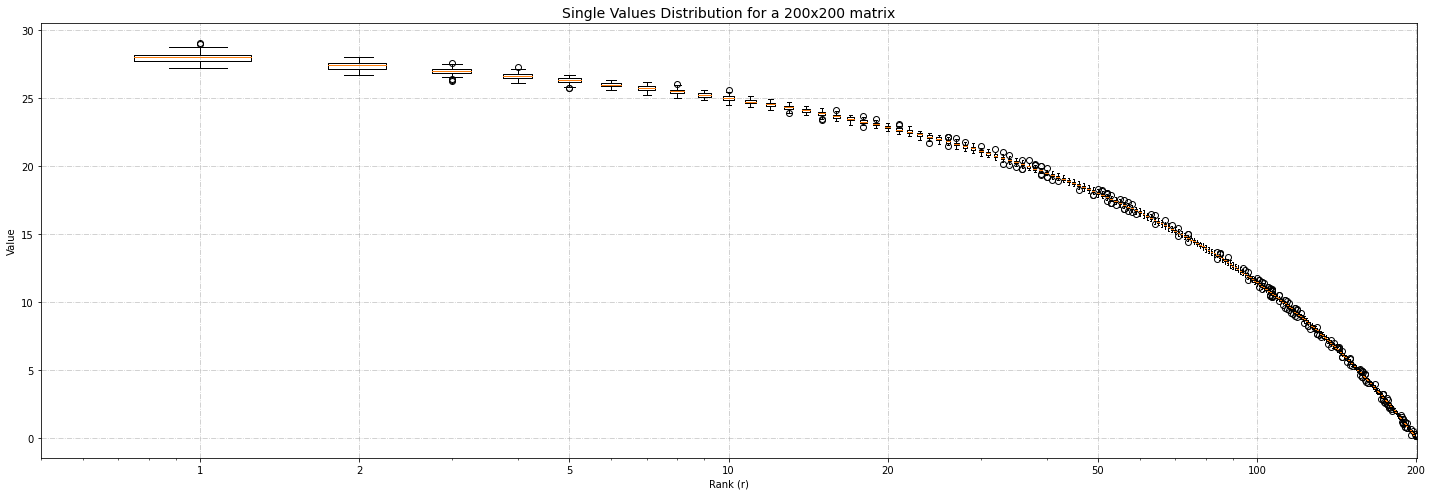

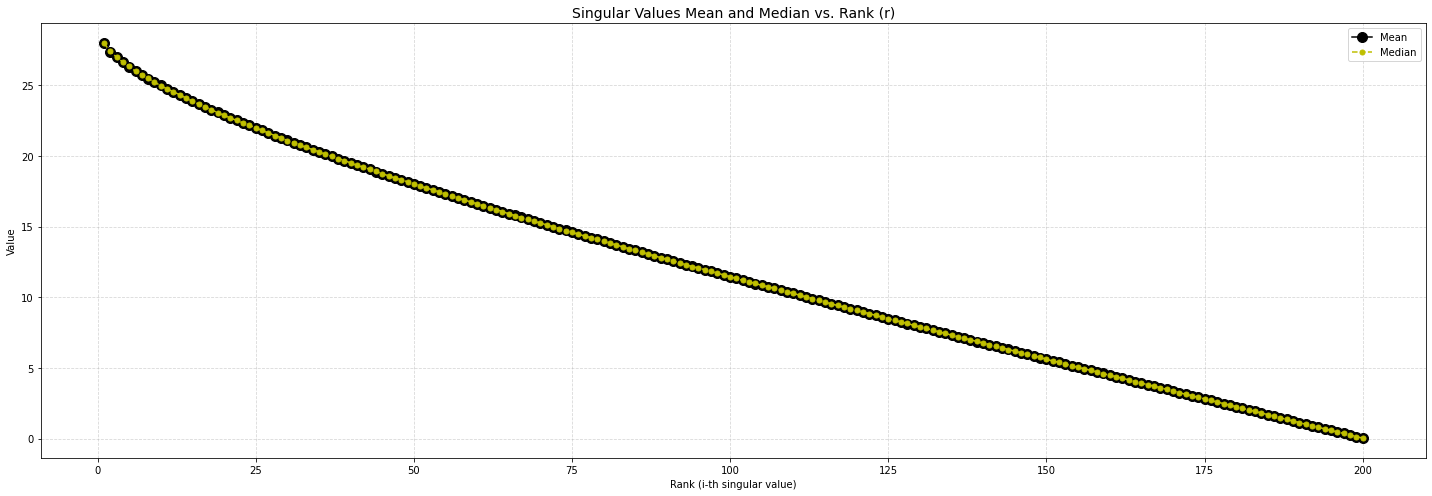

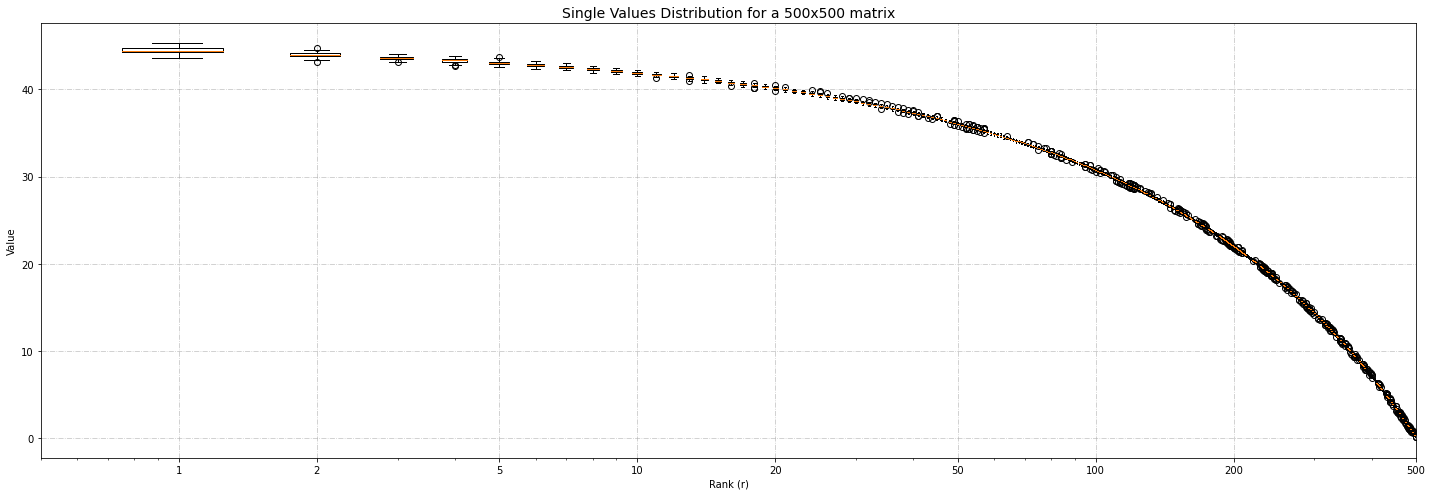

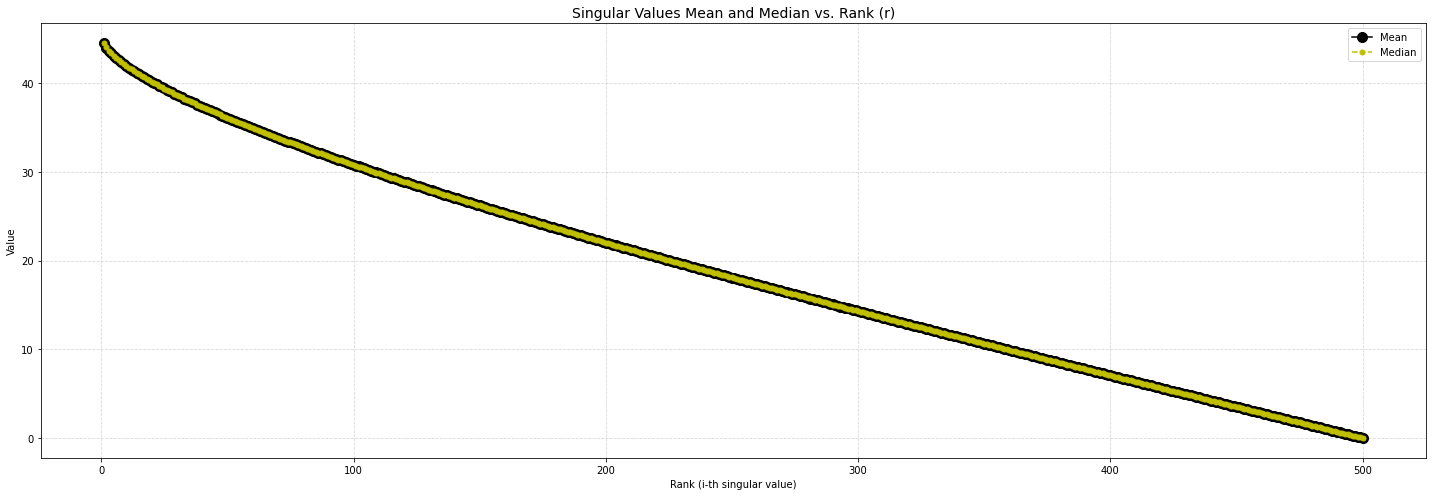

In [15]:
# Let's repeat the same process for a 50x50 matrix
for j in [50, 200, 500]:    
    singular_values = np.zeros((n, j))

    for i in range(n):
        X = np.random.normal(size=(j, j)) 
        U, S, VT = np.linalg.svd(X, full_matrices=True)
        singular_values[i, :] = S

    if j < 100:
        plt.figure(figsize=(20, 7))
        plt.boxplot(singular_values, labels=range(1, j+1))
        plt.title(f'Single Values Distribution for a {j}x{j} matrix', fontsize=14)
        plt.xlabel('Rank (r)')
        plt.ylabel('Value')
        plt.grid(linestyle='-.', alpha=0.7)
        plt.xticks(rotation=45, ha='right', fontsize=10)
        plt.tight_layout()
        plt.show()
    elif j < 201:
        plt.figure(figsize=(20, 7))
        plt.boxplot(singular_values, labels=range(1, j+1))
        plt.title(f'Single Values Distribution for a {j}x{j} matrix', fontsize=14)
        plt.xlabel('Rank (r)')
        plt.ylabel('Value')
        plt.grid(linestyle='-.', alpha=0.7)
        plt.xscale('log')
        plt.xticks(
            ticks=[1, 2, 5, 10, 20, 50, 100, 200],  # Puntos clave en log-scale
            labels=['1', '2', '5', '10', '20', '50', '100', '200'],  # Etiquetas limpias
            fontsize=10
        )
        plt.tight_layout()
        plt.show()
    else:
        plt.figure(figsize=(20, 7))
        plt.boxplot(singular_values, labels=range(1, j+1))
        plt.title(f'Single Values Distribution for a {j}x{j} matrix', fontsize=14)
        plt.xlabel('Rank (r)')
        plt.ylabel('Value')
        plt.grid(linestyle='-.', alpha=0.7)
        plt.xscale('log')
        plt.xscale('log')
        plt.xticks(
            ticks=[1, 2, 5, 10, 20, 50, 100, 200, 500],
            labels=['1', '2', '5', '10', '20', '50', '100', '200', '500'],
            fontsize=10
        )
        plt.tight_layout()
        plt.show()

    mean= np.mean(singular_values, axis=0)
    median = np.median(singular_values, axis=0)

    # And here we're ploting the results
    plt.figure(figsize=(20, 7))
    plt.plot(range(1, j + 1), mean, 'ko-', label="Mean", markersize=10)
    plt.plot(range(1, j + 1), median, 'yo--', label="Median", markersize=5)
    plt.title("Singular Values Mean and Median vs. Rank (r)", fontsize=14)
    plt.xlabel("Rank (i-th singular value)")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

3. Compare the singular value distributions for a $1000 \times 1000$ uniformly distributed random matrix and a Gaussian random matrix of the same size. Adapt the Gavish–Donoho algorithm to filter uniform noise based on this singular value distribution. Add uniform noise to a data set (either an image or the test low-rank signal) and apply this thresholding algorithm to filter the noise. Vary the magnitude of the noise and compare the results. Is the filtering good or bad?

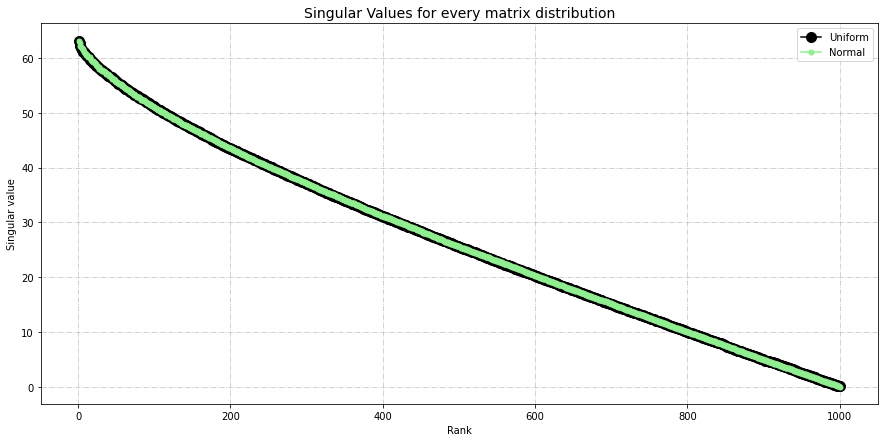

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Let's create the matrices
X_unif = np.random.uniform(low=0, high=1, size=(1000, 1000)) # Uniform Random matrix
X_unif = (X_unif - 0.5) / np.sqrt(1/12) # We're normalizing the matrix with mean=0.5 and variance=1/12
X_norm = np.random.normal(size=(1000, 1000)) # Gaussian Random matrix

S_unif = np.linalg.svd(X_unif, full_matrices=True, compute_uv=False) # Computing SVD for each matrix 
S_norm = np.linalg.svd(X_norm, full_matrices=True, compute_uv=False)

# Let's plot the singular values for each matrix
plt.figure(figsize=(15, 7))
plt.plot(range(1, 1001), S_unif, color='black', label='Uniform', marker='o', markersize=10) # We're remarking the normal distribution to see a difference
plt.plot(range(1, 1001), S_norm, color='lightgreen', label='Normal', marker='o', markersize=5)  
plt.title('Singular Values for every matrix distribution', fontsize=14)
plt.xlabel('Rank')
plt.ylabel('Singular value')
plt.grid(linestyle='-.', alpha=0.7)
plt.legend()
plt.show()

*We're defining a function to apply the Gavish-Donoho algorithm*

In [44]:
# We're going to define the Gavish-Donoho algorithm
def Gavish_Donoho(X, gamma):  # We take the matrix to clean it and the magnitude of the noise
    Xnoisy = X + gamma*np.random.randn(*X.shape)    # Adding the noise
    U, S, VT = np.linalg.svd(X, full_matrices=False)
    N = X.shape[0] #We have a squared matrix
    threshold = (4/np.sqrt(3)) * np.sqrt(N) * gamma 
    r = np.max(np.where(S > threshold)) # Rank: it's the maximum index where S > threshold
    Xclean = U[:, :r+1] @ np.diag(S[:r+1]) @ VT[:r+1, :]    # This is the cleaned matrix
    return Xclean

*Now, we're going to use a low-rank signal with a uniform noise to clean it with the algorithm made before.*

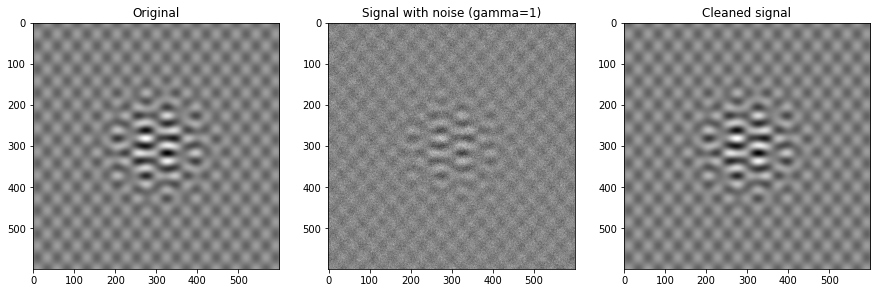

In [50]:
from matplotlib.pyplot import imshow

# This is the signal used in the book. We're using it for this example
t = np.arange(-3,3,0.01)
Utrue = np.array([np.cos(17*t) * np.exp(-t**2), np.sin(11*t)]).T
Strue = np.array([[2, 0],[0, 0.5]])
Vtrue = np.array([np.sin(5*t) * np.exp(-t**2), np.cos(13*t)]).T
X = Utrue @ Strue @ Vtrue.T

# The signal with the noise
gamma = 1   # The magnitude of the noise
Xnoisy = X + gamma*np.random.randn(*X.shape)

# Cleaned signal
Xclean = Gavish_Donoho(X, gamma)

# Let's plot the images
plt.figure(figsize=(15, 5))
plt.subplot(131); plt.imshow(X, cmap='gray'); plt.title('Original')
plt.subplot(132); plt.imshow(Xnoisy, cmap='gray'); plt.title(f'Signal with noise (gamma={gamma})')
plt.subplot(133); plt.imshow(Xclean, cmap='gray'); plt.title('Cleaned signal')
plt.show()

*Now, we're going to vary the magnitude of the noise to compare the results.*

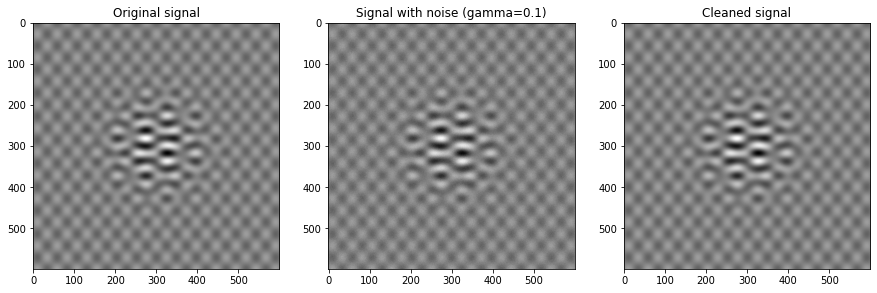

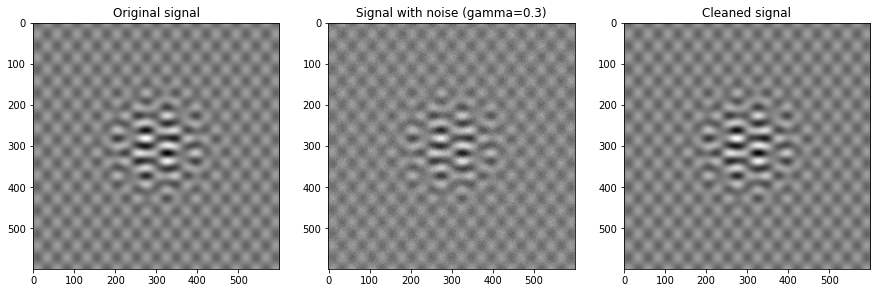

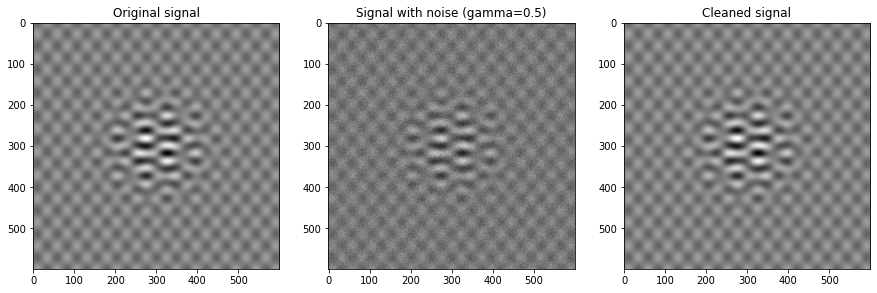

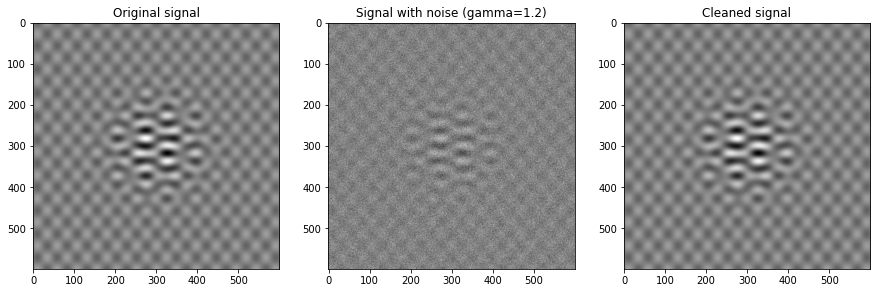

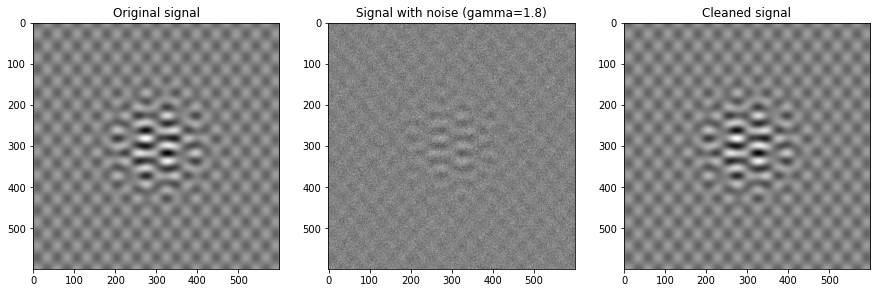

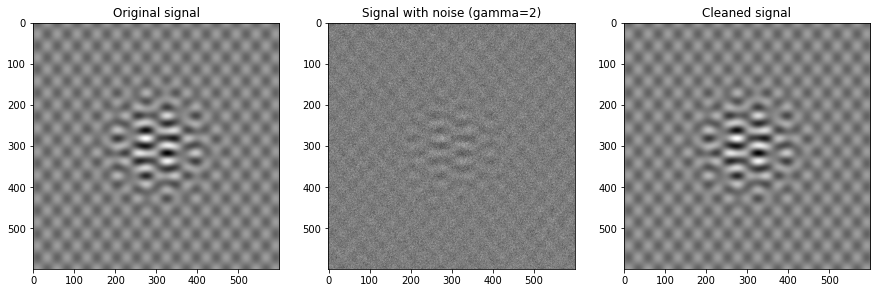

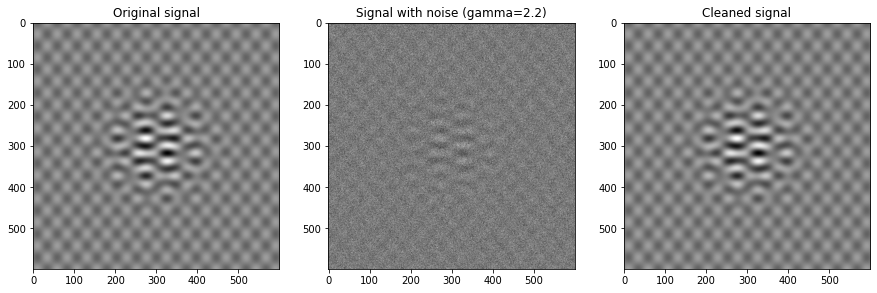

In [56]:
for gamma in [0.1, 0.3, 0.5, 1.2, 1.8, 2, 2.2]:
    Xnoisy = X + gamma*np.random.randn(*X.shape)
    Xclean = Gavish_Donoho(X, gamma)
    plt.figure(figsize=(15, 5))
    plt.subplot(131); plt.imshow(X, cmap='gray'); plt.title('Original signal')
    plt.subplot(132); plt.imshow(Xnoisy, cmap='gray'); plt.title(f'Signal with noise (gamma={gamma})')
    plt.subplot(133); plt.imshow(Xclean, cmap='gray'); plt.title('Cleaned signal')
    plt.show()

*We can conclude that the filter is **good**.*